In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('dataset_kip2.csv', index_col=0)
df

,Nama,Usia,Tanggal Lahir,Alamat,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Keluarga,Jumlah Tanggungan Anak,Status Rumah,Jenis Lantai,Jenis Dinding,Status
NO,,,,,,,,,,,,
1,Tari Nurul,17,11/22/2007,"Perumahan Pesona Asri, Kec. Cibadak, Sukabumi,...",Wiraswasta,500000,3,2,Milik Sendiri,Semen,Tembok,Tidak Layak
2,Xenia Arum,17,10/21/2007,"Kampung Cikundul, Kec. Lembursitu, Sukabumi, J...",Petani,3000000,5,4,Sewa,Keramik,Tembok,Tidak Layak
3,Oki Saputra,17,7/15/2008,"Kampung Lembursitu, Sukabumi, Jawa Barat",Pedagang,500000,6,3,Milik Sendiri,Keramik,Kayu,Tidak Layak
4,Cinta Sari,15,4/19/2008,"Kampung Selajambe, Kec. Cisaat, Sukabumi, Jawa...",PNS,500000,7,4,Milik Sendiri,Keramik,Kayu,Layak
5,Vina Ayu,18,9/7/2007,"Kampung Cisaat, Sukabumi, Jawa Barat",Petani,5000000,5,1,Milik Sendiri,Semen,Tembok,Tidak Layak
...,...,...,...,...,...,...,...,...,...,...,...,...
506,Wira Andika,18,4/9/2009,"Kampung Cibeureum, Kec. Cisaat, Sukabumi, Jawa...",Karyawan Swasta,1000000,4,3,Milik Sendiri,Keramik,Kayu,Tidak Layak
507,Eka Wulandari,16,12/28/2008,"Kampung Lembursitu, Sukabumi, Jawa Barat",Wiraswasta,1000000,4,3,Sewa,Keramik,Tembok,Tidak Layak
508,Sari Amelia,16,8/22/2009,"Kampung Selajambe, Kec. Cisaat, Sukabumi, Jawa...",Karyawan Swasta,5000000,6,5,Sewa,Keramik,Tembok,Tidak Layak


In [ ]:
def categorize_penghasilan(value):
    if value <= 2000000:
        return 'rendah'
    elif value <= 3000000:
        return 'sedang'
    elif value <= 4000000:
        return 'tinggi'
    else:
        return 'sangat tinggi'  # Handle values greater than 4000000

df['Penghasilan Orang Tua'] = df['Penghasilan Orang Tua'].apply(categorize_penghasilan)

In [ ]:
df_new = df.drop(columns=['Nama', 'Usia', 'Tanggal Lahir','Alamat'])

In [ ]:
print(df_new)

    Pekerjaan Orang Tua Penghasilan Orang Tua  Jumlah Keluarga  \
NO                                                               
1            Wiraswasta                rendah                3   
2                Petani                sedang                5   
3              Pedagang                rendah                6   
4                   PNS                rendah                7   
5                Petani         sangat tinggi                5   
..                  ...                   ...              ...   
506     Karyawan Swasta                rendah                4   
507          Wiraswasta                rendah                4   
508     Karyawan Swasta         sangat tinggi                6   
509                 PNS         sangat tinggi                3   
510              Petani                sedang                6   

     Jumlah Tanggungan Anak   Status Rumah Jenis Lantai Jenis Dinding  \
NO                                                                  

In [ ]:
print("Data Shape : ", df.shape)

Data Shape :  (510, 12)


In [ ]:
df.Status.value_counts()

,count
Status,
Tidak Layak,427
Layak,83


In [ ]:
df.isnull().sum()

,0
Nama,0
Usia,0
Tanggal Lahir,0
Alamat,0
Pekerjaan Orang Tua,0
Penghasilan Orang Tua,0
Jumlah Keluarga,0
Jumlah Tanggungan Anak,0
Status Rumah,0
Jenis Lantai,0


In [ ]:
df.duplicated()

,0
NO,
1,False
2,False
3,False
4,False
5,False
...,...
506,False
507,False
508,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 1 to 510
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nama                    510 non-null    object
 1   Usia                    510 non-null    int64 
 2   Tanggal Lahir           510 non-null    object
 3   Alamat                  510 non-null    object
 4   Pekerjaan Orang Tua     510 non-null    object
 5   Penghasilan Orang Tua   510 non-null    object
 6   Jumlah Keluarga         510 non-null    int64 
 7   Jumlah Tanggungan Anak  510 non-null    int64 
 8   Status Rumah            510 non-null    object
 9   Jenis Lantai            510 non-null    object
 10  Jenis Dinding           510 non-null    object
 11  Status                  510 non-null    object
dtypes: int64(3), object(9)
memory usage: 51.8+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identifikasi kolom yang berisi data string
categorical_columns = ['Pekerjaan Orang Tua', 'Status Rumah', 'Jenis Lantai', 'Jenis Dinding', 'Penghasilan Orang Tua']
numerical_columns = ['Usia', 'Jumlah Keluarga', 'Jumlah Tanggungan Anak']

# Gunakan ColumnTransformer untuk menerapkan OneHotEncoder dan StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

x_scaled = preprocessor.fit_transform(df)

print(x_scaled)

[[ 0.          0.          0.         ...  0.43390731 -1.33558496
  -0.32647139]
 [ 0.          0.          0.         ...  0.43390731  0.06451438
   1.14049258]
 [ 0.          0.          1.         ...  0.43390731  0.76456405
   0.40701059]
 ...
 [ 1.          0.          0.         ... -0.46201467  0.76456405
   1.87397457]
 [ 0.          1.          0.         ...  0.43390731 -1.33558496
  -0.32647139]
 [ 0.          0.          0.         ... -1.35793666  0.76456405
  -0.32647139]]


In [ ]:
x = df.drop(columns=['Status'])
y = df['Status']

print("X : ", x.shape)
print("Y : ", y.shape)

X :  (510, 11)
Y :  (510,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("jumlah baris dan kolom")
print("data set awal :", df.shape)
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

jumlah baris dan kolom
data set awal : (510, 12)
x_train : (408, 11)
y_train : (408,)
x_test :  (102, 11)
y_test :  (102,)


In [ ]:
# Buat model SVM dengan pipeline
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'classifier__kernel' : ['linear', 'rbf'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=cv, scoring='accuracy')


In [ ]:
grid_search.fit(x_train, y_train)
print("Parameter terbaik yang ditemukan:")
print(grid_search.best_params_)
best_score = grid_search.best_score_ * 100
print(f"Akurasi terbaik yang ditemukan: {best_score:.2f}%")

Parameter terbaik yang ditemukan:
{'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Akurasi terbaik yang ditemukan: 98.28%


In [ ]:
# Transformasi data latih dan data uji menggunakan ColumnTransformer
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)


In [ ]:
# Latih model
svm_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Pekerjaan Orang Tua',
                                                   'Status Rumah',
                                                   'Jenis Lantai',
                                                   'Jenis Dinding',
                                                   'Penghasilan Orang Tua']),
                                                 ('num', StandardScaler(),
                                                  ['Usia', 'Jumlah Keluarga',
                                                   'Jumlah Tanggungan '
                                                   'Anak'])])),
                ('classifier', SVC())])

In [ ]:
clf = SVC(kernel='linear')

In [ ]:
clf.fit(x_train_processed, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_test_processed)

Confusion Matrix:
[[17  2]
 [ 0 83]]

Accuracy Score: 0.9803921568627451

Classification Report:
              precision    recall  f1-score   support

       Layak       1.00      0.89      0.94        19
 Tidak Layak       0.98      1.00      0.99        83

    accuracy                           0.98       102
   macro avg       0.99      0.95      0.97       102
weighted avg       0.98      0.98      0.98       102


F1 Score (Layak): 0.9444444444444444


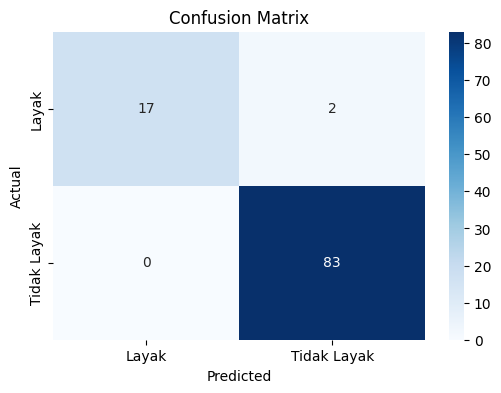

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", acc_score)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# F1 Score untuk kelas 'Layak'
f1_positive = f1_score(y_test, y_pred, pos_label='Layak')
print("\nF1 Score (Layak):", f1_positive)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Layak', 'Tidak Layak'], yticklabels=['Layak', 'Tidak Layak'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Hitung akurasi dan tampilkan classification report
CLF_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

       Layak       1.00      0.89      0.94        19
 Tidak Layak       0.98      1.00      0.99        83

    accuracy                           0.98       102
   macro avg       0.99      0.95      0.97       102
weighted avg       0.98      0.98      0.98       102

Akurasi SVM : 98.04%


In [ ]:
from sklearn.metrics import classification_report, f1_score

# Menghitung F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Menghitung dan menampilkan classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Menampilkan F1 score keseluruhan dan per kelas
print("F1 Score Keseluruhan (Weighted): {:.2f}".format(f1))
for label, metrics in report.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"F1 Score untuk Kelas {label}: {metrics['f1-score']:.2f}")



F1 Score Keseluruhan (Weighted): 0.98
F1 Score untuk Kelas Layak: 0.94
F1 Score untuk Kelas Tidak Layak: 0.99


F1 Score (weighted): 0.98


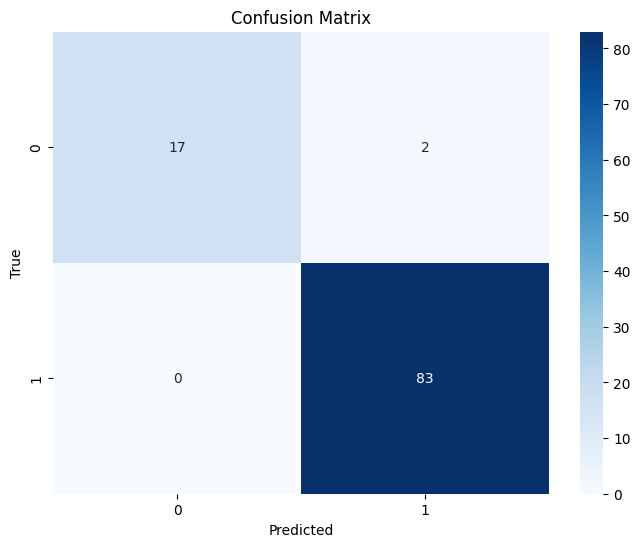

Classification Report:
              precision    recall  f1-score   support

       Layak       1.00      0.89      0.94        19
 Tidak Layak       0.98      1.00      0.99        83

    accuracy                           0.98       102
   macro avg       0.99      0.95      0.97       102
weighted avg       0.98      0.98      0.98       102

Akurasi SVM : 98.04%


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (weighted): {:.2f}".format(f1))

# Hitung dan tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan Akurasi
CLF_acc = accuracy_score(y_test, y_pred)
print("Akurasi SVM : {:.2f}%".format(CLF_acc * 100))
